# Free fall considering drag
This code ilustrates one-dimensional particle kinematics by studying classical projectile launch.

By:
**Juan A. Ramírez Macías**  
*Mech. Eng. Professor*  
*Universidad Pontificia Bolivariana*

## Modules

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Parameters

In [19]:
# Initial condition at t = 0
# Position
y0 = 0.0
# Velocity
v0 = 2.0 # m/s

# Gravity
g = 9.8 # m/s^2

# Drag-related parameters
# Density
rho = 1.225 # kg/m^3
# Mass
m = 2.8e-3 # kg
# Diameter
d = 40.e-3 # m
# Projected area
A = np.pi * d ** 2 / 4. # m^2
# Drag coefficient
Cd = 0.47 # non-dimensional
# Drag constant
Ka = 0.5 * rho * A * Cd / m # m^(-1)

print "Ka:", Ka, "m^(-1)"

Ka: 0.129197997879 m^(-1)


## Free fall, no drag

In [20]:
# Free-fall model
# Final time
tf = 0.3 # s
# Time-step
dt = 0.01 # s

# Time in seconds
t1 = np.arange(0., tf + dt, dt)

# Position in meters
y1 = y0 + v0 * t1 - 0.5 * g * t1 ** 2

# Velocity in m/s
v1 = v0 - g * t1

## Launch up, including drag

### Max height
$$y_{\max} = \frac{1}{k} \operatorname{ln} \left( 1 + \frac{k}{g} v_0^2 \right)$$

In [21]:
ymax = np.log(1. + Ka / g * v0 ** 2) / 2. / Ka
print ymax

0.198882619546


### Velocity as a function of position
$$v(y) = \sqrt{\left( \frac{g}{k} + v_0^2 \right) \operatorname{e} ^ { - 2 k y } - \frac{g}{k}}$$

In [22]:
dy = 0.001 # m
y2 = np.arange(0., ymax, dy)
v2y = np.sqrt(((g / Ka + v0 ** 2) * np.exp(-2. * Ka * y2)) - g / Ka)

### Time to max height
$$ t_{\max} = \frac{1}{\sqrt{k g}} \tan^{-1}\left( \sqrt{\frac{k}{g}} v_0 \right)$$

In [23]:
tmax = 1. / np.sqrt(Ka * g) * np.arctan(np.sqrt(Ka / g) * v0)
tinf = np.pi / 2. / np.sqrt(g * Ka)
print tinf, tmax

1.39597919994 0.200603691395


### Velocity as a function of time
$$v(t) = \frac{v_0 - \sqrt{g / k} \tan \left(\sqrt{g k} t \right)} {1 + v_0 \sqrt{k / g} \tan \left(\sqrt{g k} t \right)}$$

In [24]:
t2 = np.arange(0., tmax, dt)
#v2 = np.sqrt(g / Ka) * np.tan(- np.sqrt(g * Ka) * t2 + np.arctan(np.sqrt(Ka / g) * v0))
v2 = (v0 - np.sqrt(g / Ka) * np.tan(np.sqrt(g * Ka) * t2)) / (1. + v0 * np.sqrt(Ka / g) * np.tan(np.sqrt(g * Ka) * t2))

### Numerical solution

In [25]:
# Sample time
h = 0.01 # s

# Time array
t_k = np.arange(0., tf + h, h)

# Empty arrays
# Velocity
V_k = np.zeros_like(t_k)
# Position
y_k = np.zeros_like(t_k)

# Initial velocity
V_k[0] = v0
# Initial position
y_k[0] = y0

# Loop to compute the discrete problem
for k in range(len(t_k) - 1):
    # Acceleration
    a = - g - Ka * V_k[k] * np.abs(V_k[k])
    
    # Velocity
    V_k[k+1] = V_k[k] + h * a
    
    # Position
    y_k[k+1] = y_k[k] + h * 0.5 * (V_k[k] + V_k[k+1])

## Plots
### Time plots

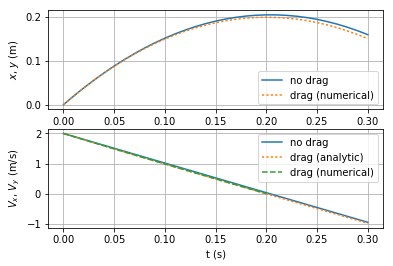

In [26]:
plt.figure()

# Position
plt.subplot(211)
plt.plot(t1, y1)
plt.plot(t_k, y_k, ':C1')
plt.ylabel('$x$, $y$ (m)')
plt.legend(['no drag', 'drag (numerical)'])
plt.grid()

# Velocity
plt.subplot(212)
plt.plot(t1, v1, 'C0')
plt.plot(t_k, V_k, ':C1')
plt.plot(t2, v2, '--C2')
plt.xlabel('t (s)')
plt.ylabel('$V_x$, $V_y$ (m/s)')
plt.legend(['no drag', 'drag (analytic)', 'drag (numerical)'])
plt.grid()
plt.show()

### Velocity as a function of position

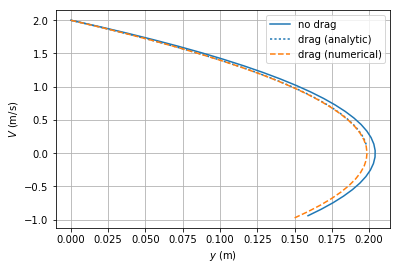

In [27]:
plt.figure()
# No drag
plt.plot(y1, v1)
# Drag, analytical
plt.plot(y2, v2y, ':C0')
# Drag, numerical
plt.plot(y_k, V_k, '--C1')
# Axes settings
plt.xlabel('$y$ (m)')
plt.ylabel('$V$ (m/s)')
plt.legend(['no drag', 'drag (analytic)', 'drag (numerical)', '$V_y$ drag'])
plt.grid()
plt.show()